In [1]:
import math
from datetime import timedelta, datetime
from operator import attrgetter

import matplotlib.pyplot as plt
import numpy as np
import trajan as ta
import xarray as xr
from IPython.display import HTML
from matplotlib.animation import FuncAnimation

import os
# from salishsea_tools import nc_tools, places

import parcels


import cmocean.cm as cm
import copy



In [2]:

path = {'NEMO': '/results2/SalishSea/nowcast-green.202111/',
'coords': '/ocean/vvalenzuela/MOAD/grid/coordinates_seagrid_SalishSea201702.nc',
'mask': '/ocean/vvalenzuela/MOAD/grid2/mesh_mask202108_TDV.nc',
# 'out': '/home/vvalenzuela/MOAD/Ocean_Parcels/results/Mixing_Advection_Sinking',
'bat': '/ocean/vvalenzuela/MOAD/grid/bathymetry_202108.nc'}
# 'home': '/home/vvalenzuela/MOAD/analysis-vicente/Ocean_Parcels',}

coords, mask = [xr.open_dataset(path[key], decode_times=False) for key in ('coords', 'mask')]
gridlon, gridlat = [coords[key][0, ...].values for key in ('glamt', 'gphit')]
tmask = mask.tmask[0, 0, ...].values

# lon, lat = places.PLACES[location]['lon lat']
# def filename_set(start,length,varlist=['U','V','W'],local=0):
#     '''filename,variables,dimensions = filename_set(start,duration,varlist=['U','V','W'],local=1)
#     Modify function to include more default variables
#     define start as: e.g, datetime(2018, 1, 17)
#     length= number of days'''
    
#     duration = timedelta(days=length)
#     #Build filenames
#     paths = path(local)
#     Rlist,Tlist,Ulist, Vlist, Wlist = [], [], [], [], []
#     # Waveslist = []
#     # Flist = []
#    #


# def make_prefix(date, path, res='h'):
#     """Construct path prefix for local SalishSeaCast results given date object and paths dict
#     e.g., /results2/SalishSea/nowcast-green.201905/daymonthyear/SalishSea_1h_yyyymmdd_yyyymmdd
#     """

#     datestr = '_'.join(np.repeat(date.strftime('%Y%m%d'), 2))
#     folder = date.strftime("%d%b%y").lower()
#     prefix = os.path.join(path, f'{folder}/SalishSea_1{res}_{datestr}')
    
#     return prefix

# paths = path
# start = datetime(2024, 5, 6)
# duration = timedelta(days=1)
# Ulist, Vlist, Wlist = [], [], []
# for day in range(duration.days):
#     path_NEMO = make_prefix(start + timedelta(days=day), paths['NEMO'])
#     # path_NEMO_d = make_prefix(start + timedelta(days=day), paths['NEMO'],res='d')
#     Ulist.append(path_NEMO + '_grid_U.nc')
#     Vlist.append(path_NEMO + '_grid_V.nc')
#     Wlist.append(path_NEMO + '_grid_W.nc')
#     # Waveslist.append(get_WW3_path(start + timedelta(days=day)))
#     # Flist.append(get_Fraser_path(start + timedelta(days=day)))


# # Load NEMO forcing 
# filenames = {
#     'U': {'lon': paths['coords'], 'lat': paths['coords'], 'depth': Wlist[0], 'data': Ulist},
#     'V': {'lon': paths['coords'], 'lat': paths['coords'], 'depth': Wlist[0], 'data': Vlist},
#     'W': {'lon': paths['coords'], 'lat': paths['coords'], 'depth': Wlist[0], 'data': Wlist},
#     'Bathy' : {'lon': paths['coords'], 'lat': paths['coords'], 'data': paths['bat']},
# }


In [3]:
def make_prefix(date, path, res='h'):
    """Construct path prefix for local SalishSeaCast results given date object and paths dict
    e.g., /results2/SalishSea/nowcast-green.201905/daymonthyear/SalishSea_1h_yyyymmdd_yyyymmdd
    """

    datestr = '_'.join(np.repeat(date.strftime('%Y%m%d'), 2))
    folder = date.strftime("%d%b%y").lower()
    prefix = os.path.join(path, f'{folder}/SalishSea_1{res}_{datestr}')
    
    return prefix

paths = path
# path_NEMO = make_prefix(start + timedelta(days=1), paths['NEMO'])

start = datetime(2024, 5, 6)
duration = timedelta(days=5)
Ulist, Vlist = [], []
# Wlist = path_NEMO + '_grid_W.nc'
# for day in range(duration.days):

path_NEMO = make_prefix(start + timedelta(days=1), paths['NEMO'])


In [4]:
filenames = {
    'U': {'lon': paths['coords'], 'lat': paths['coords'], 'depth': path_NEMO + '_grid_W.nc', 'data': path_NEMO + '_grid_U.nc'},
    'V': {'lon': paths['coords'], 'lat': paths['coords'], 'depth': path_NEMO + '_grid_W.nc', 'data': path_NEMO + '_grid_V.nc'},
    'W': {'lon': paths['coords'], 'lat': paths['coords'], 'depth': path_NEMO + '_grid_W.nc', 'data': path_NEMO + '_grid_W.nc'},
}

variables = {'U': 'vozocrtx', 'V': 'vomecrty','W': 'vovecrtz'}

dimensions = {"lat": "nav_lat", "lon": "nav_lon", "depth": "depthw", "time": "time_counter"}

# Finally, read in the fieldset using the FieldSet.from_netcdf function with the 
# above-defined filenames, variables and dimensions.

fieldset = parcels.FieldSet.from_netcdf(filenames, variables, dimensions)
print(fieldset)



/home/gwatts/miniforge3/envs/analysis-grace/lib/python3.13/site-packages/parcels/field.py:648: FileWarning: File /ocean/vvalenzuela/MOAD/grid/coordinates_seagrid_SalishSea201702.nc could not be decoded properly by xarray (version 2025.4.0). It will be opened with no decoding. Filling values might be wrongly parsed.
  with _grid_fb_class(
/home/gwatts/miniforge3/envs/analysis-grace/lib/python3.13/site-packages/parcels/field.py:648: FileWarning: File /ocean/vvalenzuela/MOAD/grid/coordinates_seagrid_SalishSea201702.nc could not be decoded properly by xarray (version 2025.4.0). It will be opened with no decoding. Filling values might be wrongly parsed.
  with _grid_fb_class(


<FieldSet>
    fields:
        <Field>
            name            : 'U'
            grid            : CurvilinearZGrid(lon=array([[-123.43, -123.42, -123.42, ..., -121.33, -121.32, -121.32],
               [-123.43, -123.43, -123.42, ..., -121.33, -121.33, -121.32],
               [-123.43, -123.43, -123.42, ..., -121.34, -121.33, -121.33],
               ...,
               [-126.39, -126.39, -126.38, ..., -124.34, -124.34, -124.34],
               [-126.40, -126.39, -126.39, ..., -124.35, -124.34, -124.34],
               [-126.40, -126.39, -126.39, ..., -124.35, -124.35, -124.34]], shape=(898, 398), dtype=float32), lat=array([[ 46.86,  46.86,  46.86, ...,  47.60,  47.60,  47.60],
               [ 46.86,  46.86,  46.87, ...,  47.60,  47.60,  47.60],
               [ 46.87,  46.87,  46.87, ...,  47.61,  47.61,  47.61],
               ...,
               [ 50.38,  50.38,  50.39, ...,  51.09,  51.10,  51.10],
               [ 50.39,  50.39,  50.39, ...,  51.10,  51.10,  51.10],
       

/home/gwatts/miniforge3/envs/analysis-grace/lib/python3.13/site-packages/parcels/field.py:648: FileWarning: File /ocean/vvalenzuela/MOAD/grid/coordinates_seagrid_SalishSea201702.nc could not be decoded properly by xarray (version 2025.4.0). It will be opened with no decoding. Filling values might be wrongly parsed.
  with _grid_fb_class(


In [5]:
pset = parcels.ParticleSet.from_line(
    fieldset=fieldset,
    pclass=parcels.JITParticle,
    size=5,  # releasing 5 particles
    depth=70,
    start=(-123.3722, 49.2022),  # releasing on a line: the start longitude and latitude
    finish=(-123.3100, 49.2060),  # releasing on a line: the end longitude and latitude
)
# pset = parcels.particleset(
#     fieldset=fieldset,
#     pclass=parcels.JITParticle,
#     lon=-123,
#     lat=49,
# )

In [6]:
# And finally execute the ParticleSet for 1 day using 4th order Runge-Kutta.

output_file = pset.ParticleFile(
    name="Parcels_SalishSeaCast_test.zarr", outputdt=timedelta(hours=1)
)
pset.execute(
    parcels.AdvectionRK4,
    runtime=duration,
    dt=timedelta(seconds=90),
    output_file=output_file,
)

INFO: Output files are stored in Parcels_SalishSeaCast_test.zarr.
 18%|█▊        | 79200.0/432000.0 [00:58<03:14, 1817.77it/s]

TimeExtrapolationError: U sampled outside time domain at time 2024-05-07T23:30:00.000000000. Try setting allow_time_extrapolation to True.

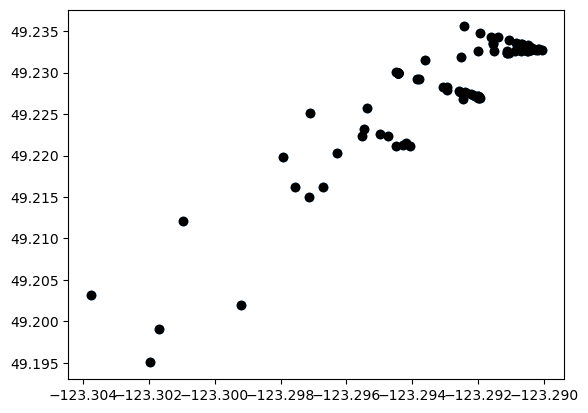

In [36]:
ds = xr.open_zarr("/ocean/gwatts/home/analysis-grace/runs/results/passive_particles_for_0172024_run_30_days_.zarr")

# ds.traj.plot(margin=2)
# ax.pcolormesh(bathy.nav_lon, bathy.nav_lat, bathy.Bathymetry, cmap=cm_deep)
# ax.set_xlim(-123.5, -123)
# ax.set_ylim(48,7, 49.2)
# 
plt.scatter(ds.lon[0,:], ds.lat[0,:])
plt.scatter(ds.lon[-1,:], ds.lat[-1,:], c='k')
ax = plt.gca()
# ax.set_xlim([-123.5*111430, -123*111430])
# ax.set_ylim([48.7*128430, 49.2*128430])
plt.show()

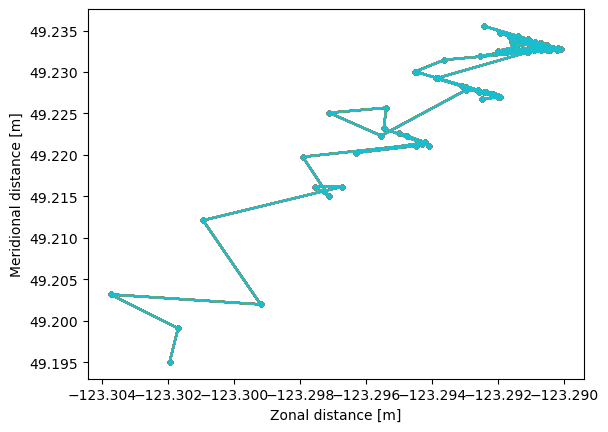

In [18]:
ds = xr.open_zarr("/ocean/gwatts/home/analysis-grace/runs/results/passive_particles_for_0172024_run_30_days_.zarr")

plt.plot(ds.lon.T, ds.lat.T, ".-")
plt.xlabel("Zonal distance [m]")
plt.ylabel("Meridional distance [m]")
plt.show()

In [8]:
ds = xr.open_zarr("/ocean/gwatts/home/analysis-grace/runs/results/passive_particles_for_0172024_run_30_days_.zarr")

In [9]:
ds 

<xarray.Dataset> Size: 29kB
Dimensions:     (trajectory: 30, obs: 30)
Coordinates:
  * obs         (obs) int32 120B 0 1 2 3 4 5 6 7 8 ... 22 23 24 25 26 27 28 29
  * trajectory  (trajectory) int64 240B 0 1 2 3 4 5 6 7 ... 23 24 25 26 27 28 29
Data variables:
    lat         (trajectory, obs) float64 7kB dask.array<chunksize=(30, 1), meta=np.ndarray>
    lon         (trajectory, obs) float64 7kB dask.array<chunksize=(30, 1), meta=np.ndarray>
    time        (trajectory, obs) datetime64[ns] 7kB dask.array<chunksize=(30, 1), meta=np.ndarray>
    z           (trajectory, obs) float64 7kB dask.array<chunksize=(30, 1), meta=np.ndarray>
Attributes:
    Conventions:            CF-1.6/CF-1.7
    feature_type:           trajectory
    ncei_template_version:  NCEI_NetCDF_Trajectory_Template_v2.0
    parcels_kernels:        JITParticleAdvectionRK4
    parcels_mesh:           spherical
    parcels_version:        3.1.2

In [20]:
cm_deep = copy.copy(cm.deep)
cm_deep.set_bad('k')

In [81]:

data = xr.open_dataset("/ocean/gwatts/home/analysis-grace/runs/depDays/passive_particles_for_1-7-2024_run_30_days_2.0.zarr")
nobs = data.obs.shape[0]
ntraj = data.trajectory.shape[0]
print (nobs, ntraj)
data.z

180 30


<xarray.DataArray 'z' (trajectory: 30, obs: 180)> Size: 43kB
[5400 values with dtype=float64]
Coordinates:
  * obs         (obs) int32 720B 0 1 2 3 4 5 6 7 ... 173 174 175 176 177 178 179
  * trajectory  (trajectory) int64 240B 0 1 2 3 4 5 6 7 ... 23 24 25 26 27 28 29
Attributes:
    long_name:      
    positive:       down
    standard_name:  depth
    units:          m

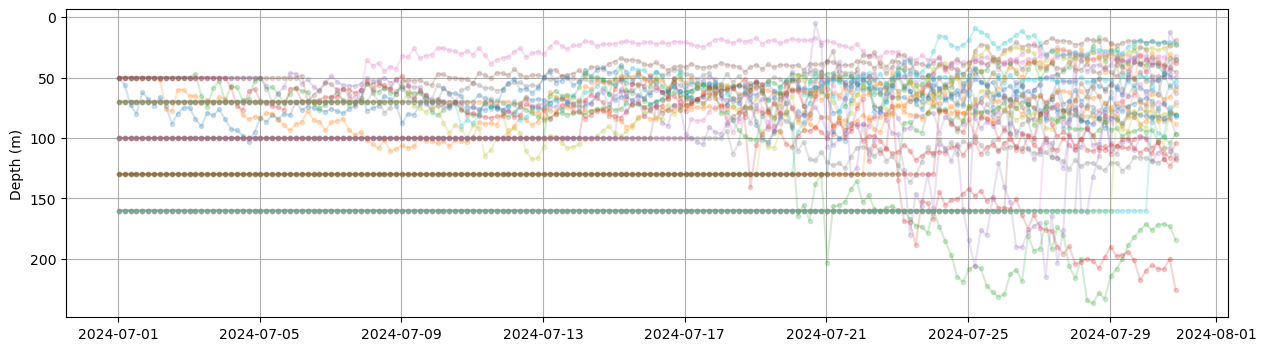

In [82]:
fig, ax = plt.subplots(1, 1, figsize=(15, 4))
tend = -1
for ii in range(ntraj):
    y = data.z[ii]
    x = data.time[ii]
    ax.plot(x, y, '.-', alpha=0.2)
# y = data.z[15, :tend]
# x = data.time[15, :tend]
# ax.plot(x, y, 'o', alpha=0.2)
# ax.set_ylim(69.9, 70.1)
ax.invert_yaxis()
ax.set_ylabel('Depth (m)')
ax.grid();

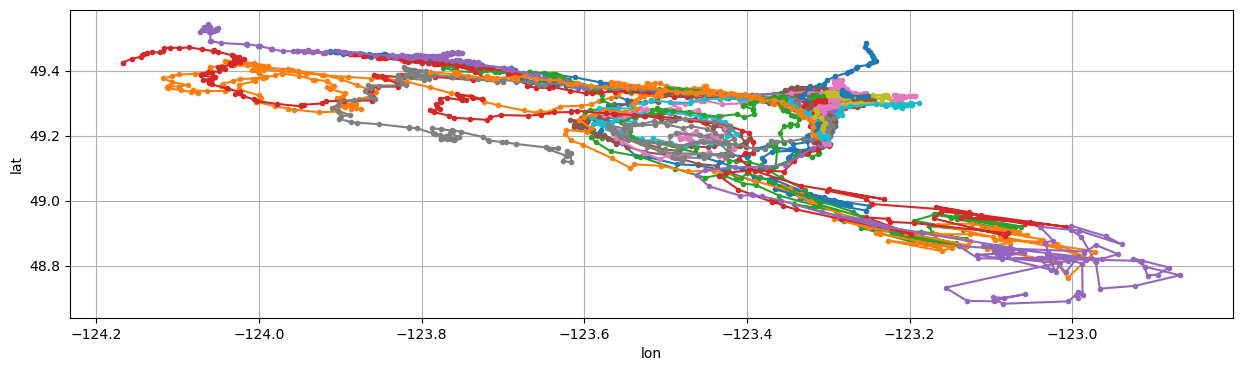

In [83]:
fig, ax = plt.subplots(1, 1, figsize=(15, 4))
tend = -1
for ii in range(ntraj):
    y = data.lat[ii]
    x = data.lon[ii]
    ax.plot(x, y, '.-')
# ax.plot(data.lat[0,0], data.lon[0,0], 'o')
ax.set_ylabel('lat')
ax.set_xlabel('lon')
ax.grid();

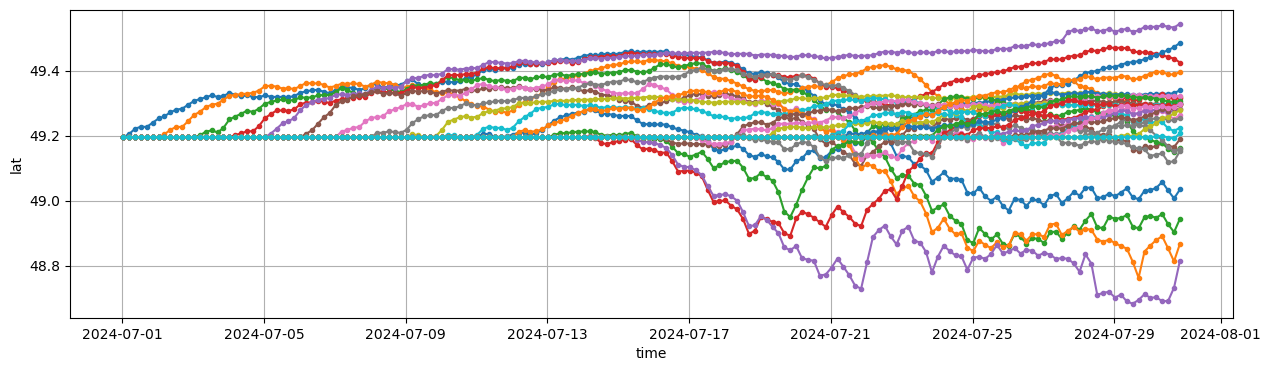

In [84]:
fig, ax = plt.subplots(1, 1, figsize=(15, 4))
tend = -1
for ii in range(ntraj):
    y = data.lat[ii]
    x = data.time[ii]
    ax.plot(x, y, '.-')
#
# y = data.lat[1]
# x = data.time[1]
# ax.plot(x, y, '.-')
# #
# y2 = data.lat[2]
# x2 = data.time[2]
# ax.plot(x2, y2, '.-')
#
ax.set_ylabel('lat')
ax.set_xlabel('time')
ax.grid();

In [14]:
constants = {}
constants['Iona_clat'] = [49.195045]
constants['Iona_clon'] = [-123.301956]
constants['Iona_z'] = 70 # m


number_particles = 5
lon=constants['Iona_clon']*np.ones(number_particles)
# depth=constants['Iona_z']*np.ones(number_particles)
depth = [50., 70., 90., 110., 130.]
lon
depth

[50.0, 70.0, 90.0, 110.0, 130.0]

In [74]:
d = [50., 70., 100., 130., 160.]
number_particles = 30
array = np.repeat(d, number_particles/len(d))


array

array([ 50.,  50.,  50.,  50.,  50.,  50.,  70.,  70.,  70.,  70.,  70.,
        70., 100., 100., 100., 100., 100., 100., 130., 130., 130., 130.,
       130., 130., 160., 160., 160., 160., 160., 160.])